In [7]:
import os # библиотека для работы с файлами
import librosa
import matplotlib.pyplot as plt
import librosa.display as ld
import numpy as np

In [2]:
dir = './queenless/queen' #задаем директорию с данными
file = dir+'/Hive1_12_06_2018_QueenBee_H1_audio___16_10_00_0.wav'
signal, sr = librosa.load(file, sr = 22050) # загружаем файл
print(signal.shape, sr)
print(signal)


(88200,) 22050
[-0.00475584 -0.00520334 -0.00319117 ...  0.00867606  0.00765259
  0.00587915]


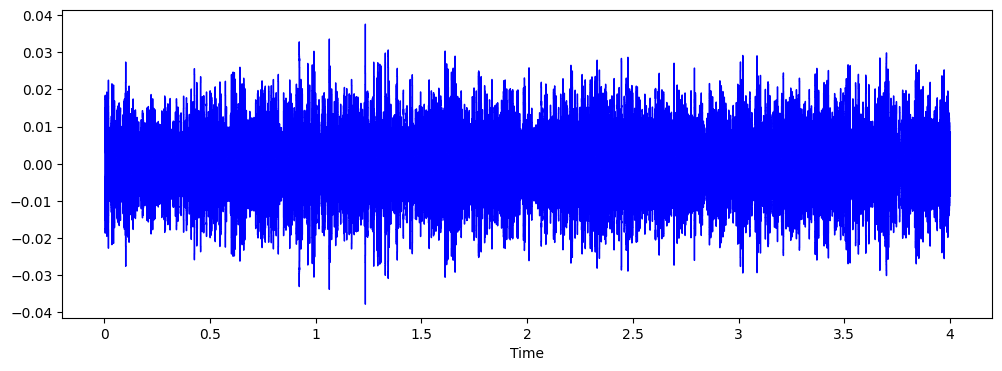

In [5]:
plt.figure(figsize=(12,4))
ld.waveshow(signal, sr=sr, color='b')

In [6]:
import IPython
display(IPython.display.Audio(signal, rate = sr))

Text(0, 0.5, 'Amplitude')

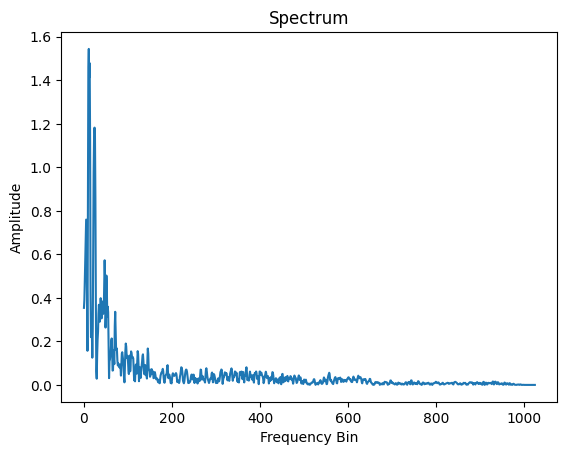

In [8]:
n_fft = 2048
ft = np.abs(librosa.stft(signal[:n_fft], hop_length = n_fft+1))
plt.plot(ft)
plt.title('Spectrum')
plt.xlabel('Frequency Bin')
plt.ylabel('Amplitude')

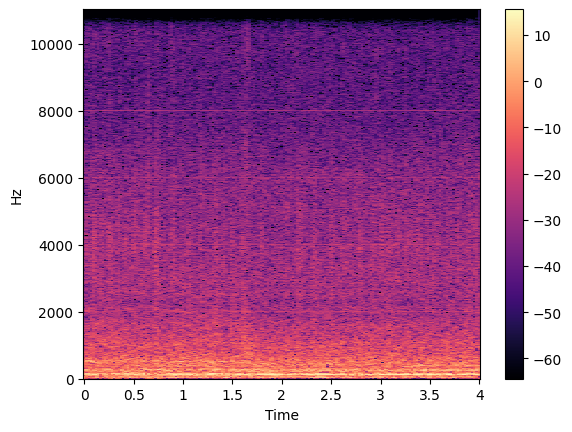

In [9]:
X = librosa.stft(signal)
s = librosa.amplitude_to_db(abs(X))
ld.specshow(s, sr=sr, x_axis = 'time', y_axis='linear')
plt.colorbar()

In [10]:
mfccs = librosa.feature.mfcc(y=signal, sr=sr, n_mfcc = 40, hop_length=512)
mfccs

array([[-392.0069    , -369.38876   , -369.53613   , ..., -371.72314   ,
        -364.31177   , -380.02026   ],
       [ 116.456154  ,  118.46821   ,  119.99455   , ...,  115.728874  ,
         113.49696   ,  108.76982   ],
       [   9.958586  ,   10.751158  ,   13.6599655 , ...,   11.389992  ,
           6.6141543 ,    4.4327545 ],
       ...,
       [  -2.0114317 ,    1.6446676 ,    2.4066486 , ...,   -1.0346162 ,
          -4.934675  ,   -4.206789  ],
       [  -7.9690533 ,   -8.622715  ,   -1.9818053 , ...,   -3.3539677 ,
          -9.486186  ,  -11.423552  ],
       [  -0.72315973,   -3.4623384 ,    2.2930446 , ...,    0.7500839 ,
          -4.1131225 ,   -3.9935288 ]], dtype=float32)

In [11]:
mfccs.shape
(40, 1293)

(40, 1293)

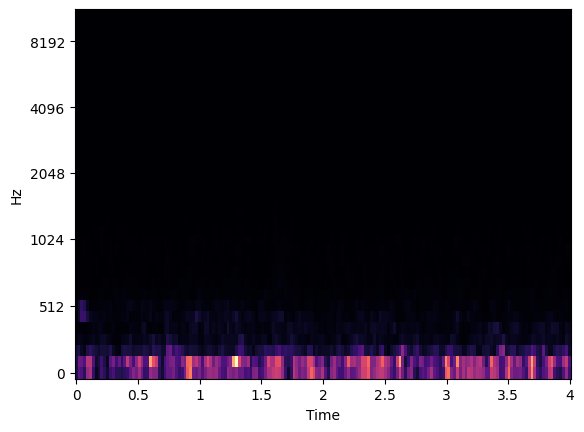

In [16]:
melspectrum = librosa.feature.melspectrogram(y=signal, sr = sr,
                                        	hop_length =512, n_mels = 40)
librosa.display.specshow(melspectrum, sr=sr, x_axis='time', y_axis='mel')

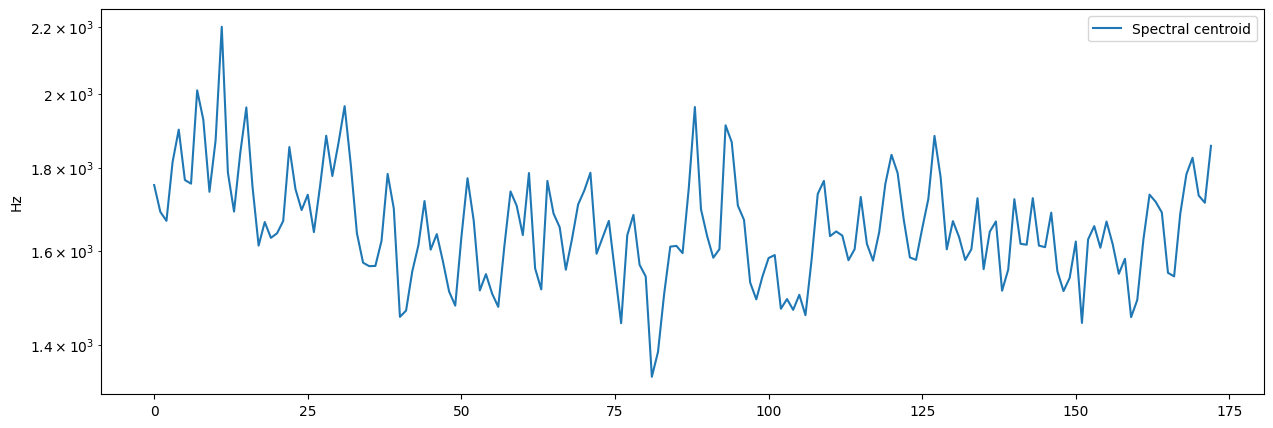

In [17]:
cent = librosa.feature.spectral_centroid(y=signal, sr=sr)
plt.figure(figsize=(15,5))
plt.semilogy(cent.T, label='Spectral centroid')
plt.ylabel('Hz')
plt.legend()

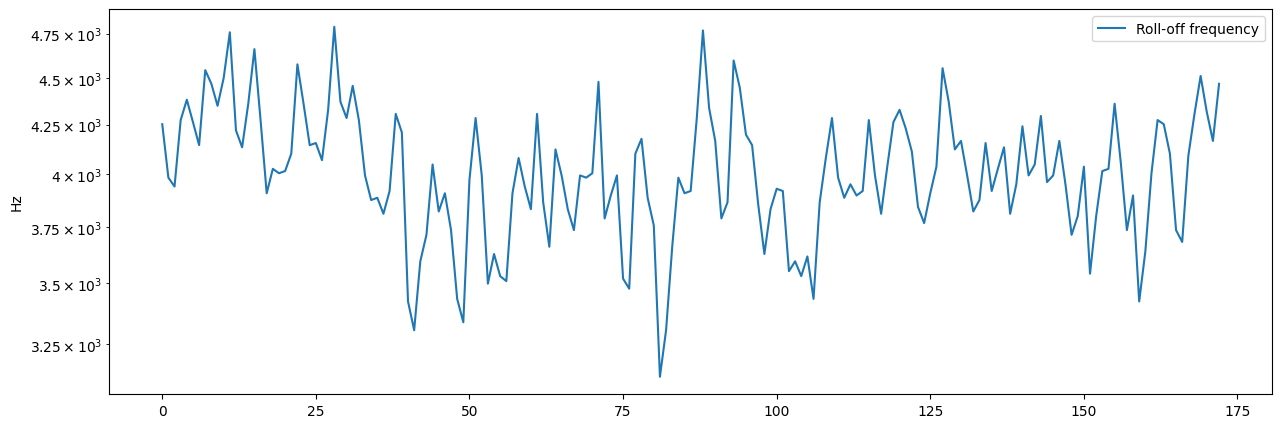

In [18]:
rolloff = librosa.feature.spectral_rolloff(y=signal, sr=sr)
plt.figure(figsize=(15,5))
plt.semilogy(rolloff.T, label='Roll-off frequency')
plt.ylabel('Hz')
plt.legend()

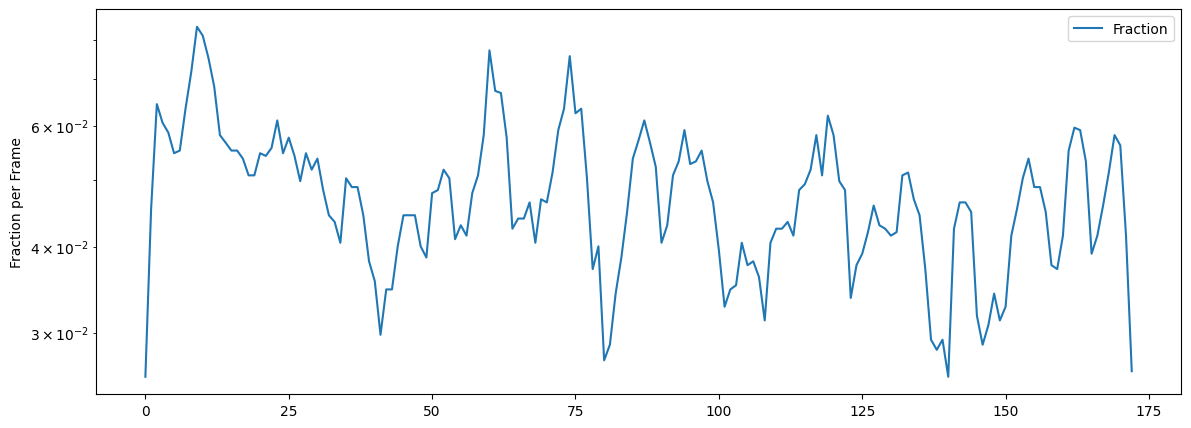

In [19]:
zrate=librosa.feature.zero_crossing_rate(signal)
plt.figure(figsize=(14,5))
plt.semilogy(zrate.T, label='Fraction')
plt.ylabel('Fraction per Frame')
plt.legend()